## CAPM Model in Python

### What is CAPM ?
* The Capital Asset Pricing Model (CAPM) describes the relationship between the expected return of assets and the systematic risk of the market.

* CAPM indicates that the expected return of an asset is equal to the risk-free return plus a risk premium.  The assumption of CAPM is that investors are rational and want to maximize return and reduce risk as much as possible. The goal of CAPM is thus **to calculate what return an investor can expect to make for a given risk premium** over the risk-free rate.

### Variables Definition
#### Risk-Free Rate ($R_{f}$) 
CAPM also assumes there there exists a risk free($r_{f}$) asset with zero standard deviation. An example of a risk-free asset include Treasury Bills as they're backed by the U.S. government.

#### Market Return ($R_{m}$) 
The market return is denoted as ($R_{m}$) and includes all securities in the market. A good representation of the U.S. market portfolio is the **S&P 500**, which is a market capitalization-weighted index of the 500 largest U.S. publicly traded companies.

#### Beta ($\beta$)
Beta is a measure of a stock's volatility in relation to the overall market, for example the S&P 500. In other words, Beta represents **the slope of the regression line**, which is the market return vs. the individual stocks return.



### CAPM Formula

Mathematically, we can define CAPM formula as follows:

$r_{i} = r_{f} + (r_{m}-r_{f})*\beta_{i}$

where:

 $r_{i}$ is the expected return of a security <br/> 
 $r_{f}$ is the risk free rate <br/>
 $\beta_{i}$ is the beta of the security relative to the market<br/>
 $r_{m}-r_{f}$ is the risk premium

In [3]:
# Sample CAPM Modeling for Samsung Electronics for 2020
import FinanceDataReader as fdr

In [14]:
# 삼성전자 데이터 로드
df = fdr.DataReader('005930', '2020-01-01', '2020-12-31')
df.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-01-02,55500,56000,55000,55200,12993228,-0.010753
2020-01-03,56000,56600,54900,55500,15422255,0.005435
2020-01-06,54900,55600,54600,55500,10278951,0.000000
2020-01-07,55700,56400,55600,55800,10009778,0.005405
2020-01-08,56200,57400,55900,56800,23501171,0.017921


In [15]:
kospi = fdr.DataReader('KS11', '2020-01-01', '2020-12-31')
kospi.head()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2020-01-02,2175.17,2201.21,2202.32,2171.84,494680000.0,-0.0102
2020-01-03,2176.46,2192.58,2203.38,2165.39,631560000.0,0.0006
2020-01-06,2155.07,2154.97,2164.42,2149.95,592670000.0,-0.0098
2020-01-07,2175.54,2166.60,2181.62,2164.27,568240000.0,0.0095
2020-01-08,2151.31,2156.27,2162.32,2137.72,913830000.0,-0.0111


In [114]:
Samsung_closed = df[["Close"]]
kospi_closed = kospi[["Close"]]

In [118]:
import pandas as pd
value_merged = pd.merge(Samsung_closed, kospi_closed, # merge할 DataFrame 객체 이름
             how='outer', # left, right, inner (default), outer
             on='Date') # merge의 기준이 되는 Key 변수

value_merged.columns = ["Close_x", "Close_y"]
renamed = value_merged.rename(columns = {"Close_x" : "SAMSUNG", "Close_y":"KOSPI"})
renamed.head()

,SAMSUNG,KOSPI
Date,,
2020-01-02,55200,2175.17
2020-01-03,55500,2176.46
2020-01-06,55500,2155.07
2020-01-07,55800,2175.54
2020-01-08,56800,2151.31


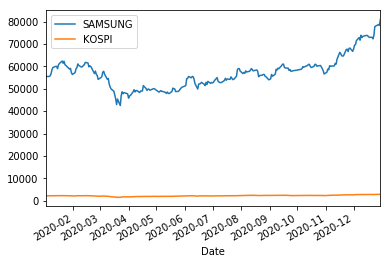

In [155]:
renamed.plot()

In [147]:
import numpy as np
beta, alpha = np.polyfit(renamed['SAMSUNG'], renamed['KOSPI'], 1)
beta_ss = beta

### Calculate CAPM of Samsung

In [163]:
mean_ss = round(renamed['SAMSUNG'].mean())

actual_return_to_mean = renamed["SAMSUNG"][-1]/mean_ss
actual_return_to_mean

1.4172484384021835

In [164]:
rf = 0 
rm = (renamed["KOSPI"][-1]/renamed["KOSPI"][1]-1)
ER_samsung = rf + (beta_ss * (rm-rf))
ER_samsung

0.011543008703138978

In [186]:
def excessive_return(x, y):
    if x > y:
        print("기대수익률을 초과합니다")
    else:
        print("초과 수익이 아닙니다")

excessive_return(actual_return_to_mean, ER_samsung)

기대수익률을 초과합니다
